# Notebook 3: Explicabilité et Interprétabilité des Modèles

**Auteurs:**  

Akram Farihi, Sami Abloui, Amalya Mourih 


**Objectifs de notebook:**

Dans ce notebook, nous réalisons l’exploration ce jeux des données. 
L’objectif est de comprendre la structure des données, identifier les variables pertinentes et observer les relations entre les attributs.


In [16]:
# Imports
from sys import path
import matplotlib.pyplot as plt

path.append('..')
import pandas as pd
import numpy as np
from src.explainability.exp_utils import calculate_probas
from src.explainability.exp_utils import create_shap_explainer
from src.explainability.exp_utils import calculate_shap_values
import mlflow
import shap
print("Les bibliothèques sont importées avec succès.")

Les bibliothèques sont importées avec succès.


Nous chargeons maintenant les données prétraitées. 

In [ ]:
# 1. Charger les quatre fichiers CSV
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

Afin d'analyser l'explicabilité du modèle de manière équilibrée, nous sélectionnons des échantillons représentatifs de chaque classe de qualité de sommeil (Poor, Fair, Good, Excellent) dans l'ensemble de test. Cette approche permet d'obtenir des visualisations SHAP cohérentes et comparables entre les différentes classes.

In [9]:
indices = [[],[],[],[]] 
for j in range(4):
    for i in range (y_test.shape[0]):
        if (y_test.iloc[i, 0] == j):
            if(len(indices[j]) < 10):
                indices[j].append(i)
            else:
                break

Poursuivons par le téléchargements des models enregistrées sur nos fichiers. 

In [ ]:
# MODIFIER LE CHEMIN EN FONCTION D'OU SE TROUVE LE FICHIER

#model_path = "../mlruns/644848172247683146/models/m-b0d1297d4f33430bb02bcec4e365c73f/artifacts" 
model_path = "../mlruns/647375204292483572/models/m-d9460f983d6d4d82b720bcebe9f836f6/artifacts"

# Check available models
import glob
available_models = glob.glob("../mlruns/647375204292483572/models/*/artifacts/*.pkl")
print("Available models:")
for model in available_models:
    print(f" - {model}")

model = mlflow.sklearn.load_model(model_path)

print(f"\n Model loaded from: {model_path}")

Available models:
 - ../mlruns/647375204292483572/models\m-0c3128a29ca64befbd4e63ab7710e983\artifacts\model.pkl
 - ../mlruns/647375204292483572/models\m-7ddb7f4d12384e12bd5eef4205a2bb40\artifacts\model.pkl
 - ../mlruns/647375204292483572/models\m-d9460f983d6d4d82b720bcebe9f836f6\artifacts\model.pkl

 Model loaded from: ../mlruns/647375204292483572/models/m-d9460f983d6d4d82b720bcebe9f836f6/artifacts


In [12]:
predict_fn = lambda X: calculate_probas(model, X)[1]

# 1. Création de l'explainer
explainer_shap = create_shap_explainer(
    predict_fn=predict_fn, 
    data=X_train 
) 

# 2. Calcul des valeurs SHAP
shap_values = [[],[],[],[]]
for i in range(4):
    shap_values[i] = (calculate_shap_values(explainer_shap, X_test.iloc[indices[i]], nsamples=50))

c:\Users\amaly\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\amaly\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\amaly\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\amaly\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\amaly\AppData\Local\Programs\Python\Python313\Lib\site-packag

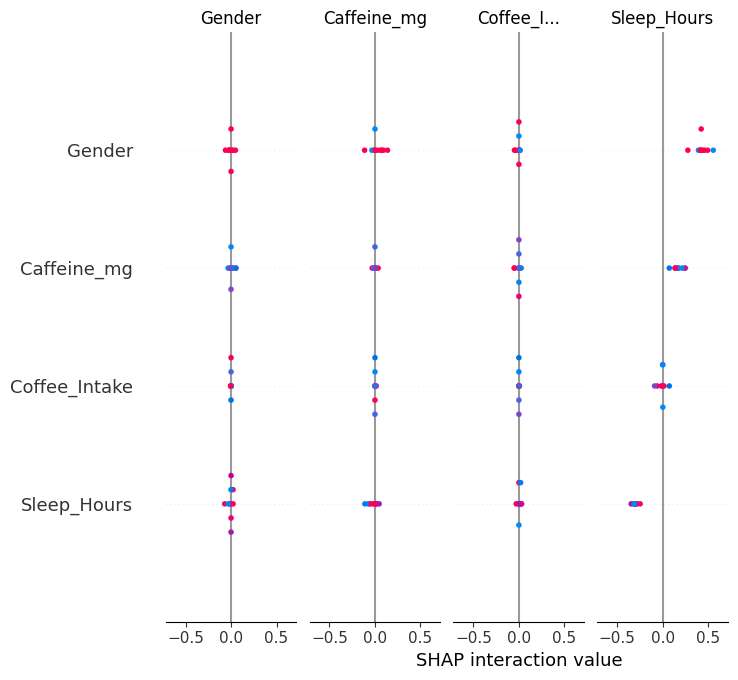

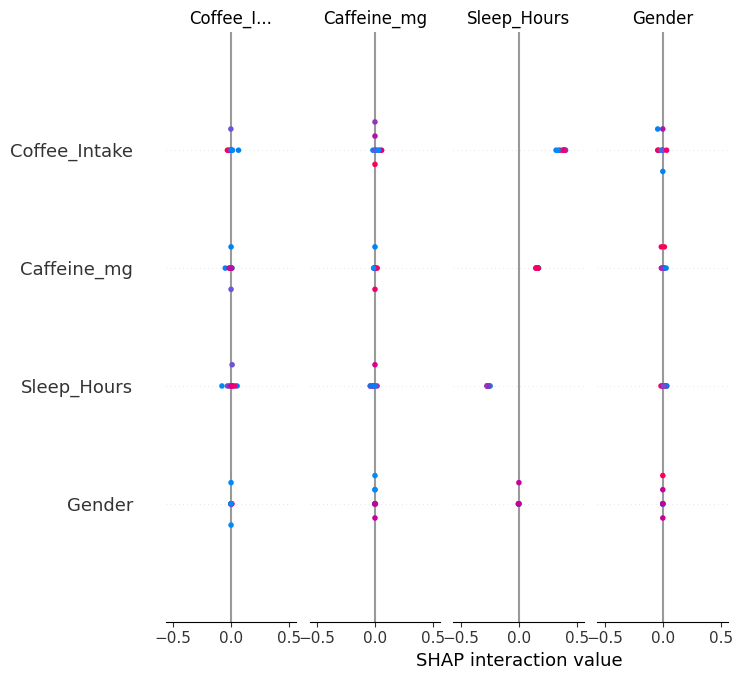

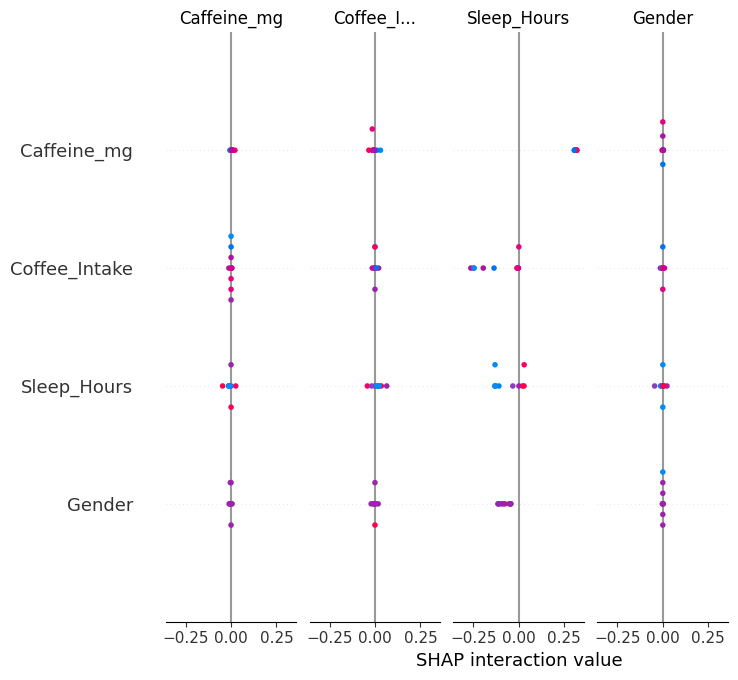

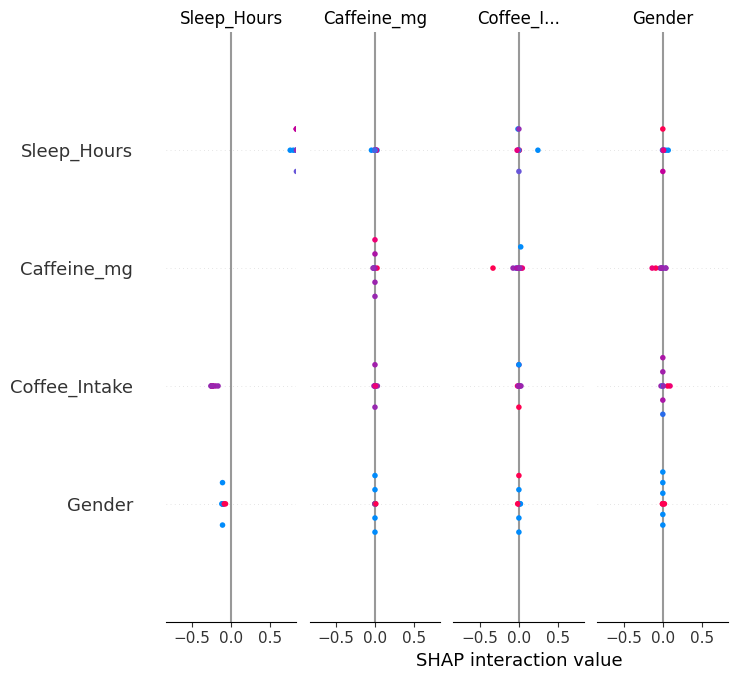

In [19]:
# Afficher les summary plots SHAP pour chaque classe
for i in range(4):
	shap.summary_plot(
		shap_values[i], 
		X_test.iloc[indices[i]], 
		feature_names=X_test.columns, 
		show=False
	)
